# COVID-19 Data Analysis with Machine Learning

### Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

### Set Visualization Style

In [2]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### Load and Explore Data

In [3]:
# Load the dataset
covid_19 = pd.read_csv("COVID-19 Dataset.csv")

In [34]:
# Basic exploration
print("\n               BASIC DATA EXPLORATION ")
print("-"*55)

print(f"Dataset Shape: {covid_19.shape}")
print(f"\nDataset Info: ")

print(covid_19.info())



               BASIC DATA EXPLORATION 
-------------------------------------------------------
Dataset Shape: (1001, 10)

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1001 non-null   object 
 1   Name of State / UT         1001 non-null   object 
 2   Latitude                   1001 non-null   float64
 3   Longitude                  1001 non-null   float64
 4   Total Confirmed cases      1001 non-null   int64  
 5   Death                      1001 non-null   int64  
 6   Cured/Discharged/Migrated  1001 non-null   int64  
 7   New cases                  1001 non-null   int64  
 8   New deaths                 1001 non-null   int64  
 9   New recovered              1001 non-null   int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 78.3+ KB
None


In [5]:
print(f"\nFirst 5 rows:")
covid_19.head()


First 5 rows:


,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,30-01-2020,Kerala,10.8505,76.2711,1,0,0,0,0,1
1,31-01-2020,Kerala,10.8505,76.2711,1,0,0,0,0,1
2,01-02-2020,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,02-02-2020,Kerala,10.8505,76.2711,3,0,0,1,0,1
4,03-02-2020,Kerala,10.8505,76.2711,3,0,0,0,0,1


In [6]:
print(f"\nLast 5 rows:")
covid_19.tail()



Last 5 rows:


,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
996,16-04-2020,Jharkhand,23.6102,85.2799,28,2,0,1,0,0
997,16-04-2020,Karnataka,15.3173,75.7139,279,12,80,19,0,9
998,16-04-2020,Kerala,10.8505,76.2711,388,3,218,1,0,40
999,15-04-2020,Ladakh,34.2996,78.2932,17,0,10,2,0,0
1000,15-04-2020,Madhya Pradesh,22.9734,78.6569,730,50,51,0,0,100


In [7]:
print(f"\nStatistical Summary:")
covid_19.describe()


Statistical Summary:


,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000
mean,22.780096,79.832911,99.716284,2.928072,9.040959,11.610390,0.0,3.635365
std,7.290362,5.721063,242.787371,12.272360,25.409985,34.240153,0.0,14.501652
min,10.850500,71.192400,1.000000,0.000000,0.000000,0.000000,0.0,-1.000000
25%,15.912900,76.085600,3.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,23.164500,78.293200,14.000000,0.000000,1.000000,0.000000,0.0,0.000000
75%,28.704100,80.946200,66.000000,1.000000,6.000000,6.000000,0.0,1.000000
max,34.299600,94.727800,2687.000000,178.000000,259.000000,356.000000,0.0,200.000000


###  Check Data Quality

In [8]:
covid_19.isnull()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
996,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False
999,False,False,False,False,False,False,False,False,False,False


In [9]:
# Check for missing values
print(f"\nMissing Values:")
print(covid_19.isnull().sum())

print(f"\nDuplicate Rows: {covid_19.duplicated().sum()}")


Missing Values:
Date                         0
Name of State / UT           0
Latitude                     0
Longitude                    0
Total Confirmed cases        0
Death                        0
Cured/Discharged/Migrated    0
New cases                    0
New deaths                   0
New recovered                0
dtype: int64

Duplicate Rows: 1


### Data Cleaning

In [35]:
print("\n                  DATA CLEANING")
print("-"*55)

# Create a copy for cleaning
covid_clean = covid_19.copy()

# Convert Date column to datetime
covid_clean['Date'] = pd.to_datetime(covid_clean['Date'], dayfirst=True)

# Check for negative values
numerical_cols = ['Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated', 
                  'New cases', 'New deaths', 'New recovered']

print("\nChecking for negative values:")
for col in numerical_cols:
    negative_count = (covid_clean[col] < 0).sum()
    print(f"{col}: {negative_count} negative values")

# Fix negative values
for col in numerical_cols:
    covid_clean[col] = covid_clean[col].abs()

# Create additional features
covid_clean['Active Cases'] = covid_clean['Total Confirmed cases'] - covid_clean['Death'] - covid_clean['Cured/Discharged/Migrated']
covid_clean['Month'] = covid_clean['Date'].dt.month
covid_clean['Day'] = covid_clean['Date'].dt.day

print(f"\nData after cleaning:")
print(f"Shape: {covid_clean.shape}")
print(f"Date range: {covid_clean['Date'].min()} to {covid_clean['Date'].max()}")


                  DATA CLEANING
-------------------------------------------------------

Checking for negative values:
Total Confirmed cases: 0 negative values
Death: 0 negative values
Cured/Discharged/Migrated: 0 negative values
New cases: 0 negative values
New deaths: 0 negative values
New recovered: 1 negative values

Data after cleaning:
Shape: (1001, 13)
Date range: 2020-01-30 00:00:00 to 2020-04-16 00:00:00


### Correlation Analysis

In [32]:
# Select numerical columns for correlation
corr_columns = ['Total Confirmed cases', 'Death', 'Cured/Discharged/Migrated', 
                'New cases', 'New deaths', 'New recovered', 'Active Cases']

correlation_matrix = covid_clean[corr_columns].corr()

print("\nCorrelation Matrix:")
correlation_matrix.round(2)


Correlation Matrix:


,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered,Active Cases
Total Confirmed cases,1.00,0.81,0.75,0.83,NaN,0.55,1.00
Death,0.81,1.00,0.70,0.75,NaN,0.35,0.78
Cured/Discharged/Migrated,0.75,0.70,1.00,0.57,NaN,0.40,0.70
New cases,0.83,0.75,0.57,1.00,NaN,0.35,0.83
New deaths,NaN,NaN,NaN,NaN,NaN,NaN,NaN
New recovered,0.55,0.35,0.40,0.35,NaN,1.00,0.56
Active Cases,1.00,0.78,0.70,0.83,NaN,0.56,1.00


###  Correlation Heatmap

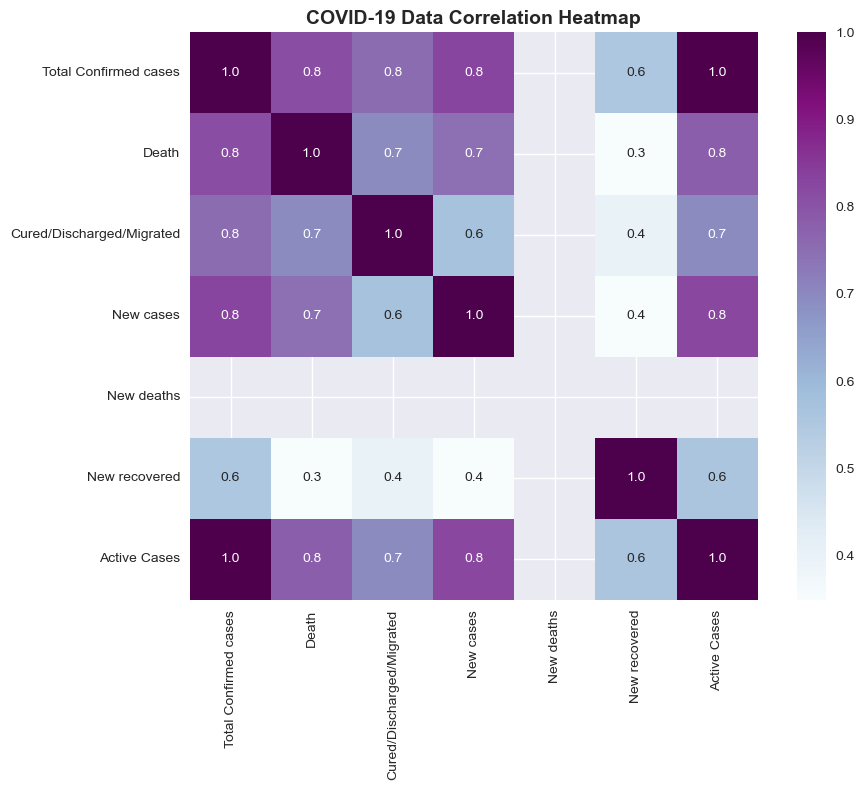

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(
    correlation_matrix,
    cbar=True,
    square=True,
    fmt='.1f',
    annot=True,
    annot_kws={'size': 10},
    cmap="BuPu")
plt.title('COVID-19 Data Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Total Cases by State

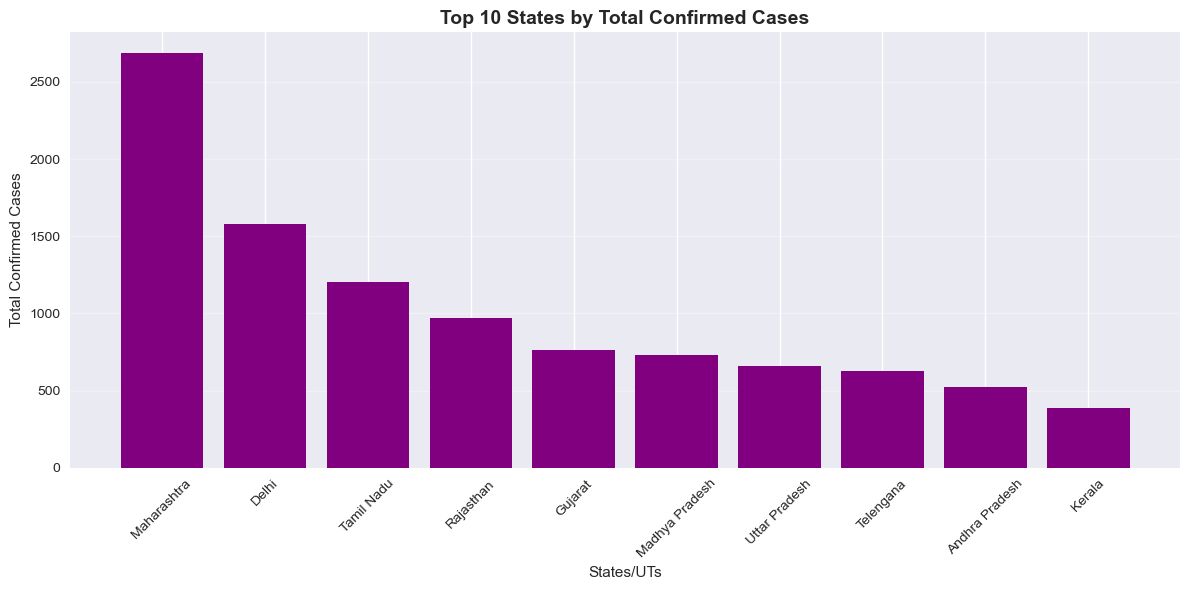

In [13]:
# Total Cases by State
plt.figure(figsize=(12,6))
state_cases = covid_clean.groupby('Name of State / UT')['Total Confirmed cases'].max().sort_values(ascending=False).head(10)
plt.bar(state_cases.index, state_cases.values, color='PURPLE')
plt.title('Top 10 States by Total Confirmed Cases', fontsize=14, fontweight='bold')
plt.xlabel('States/UTs')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Daily New Cases Trend

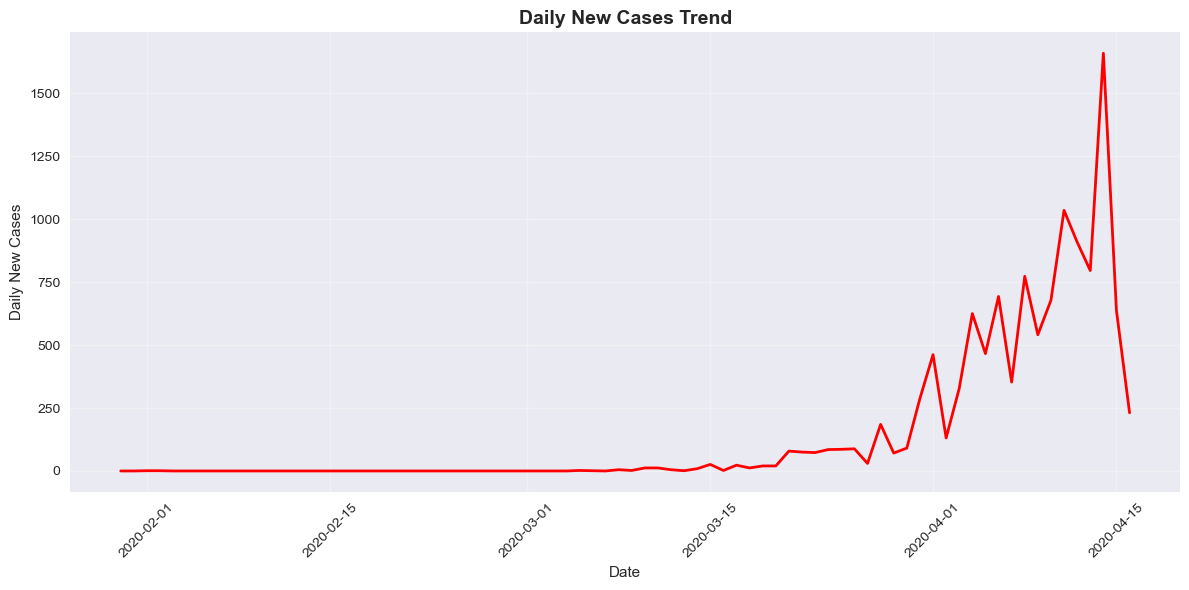

In [14]:
#  Daily New Cases Trend
plt.figure(figsize=(12,6))
daily_cases = covid_clean.groupby('Date')['New cases'].sum()
plt.plot(daily_cases.index, daily_cases.values, linewidth=2, color='red')
plt.title('Daily New Cases Trend', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Death vs Recovered

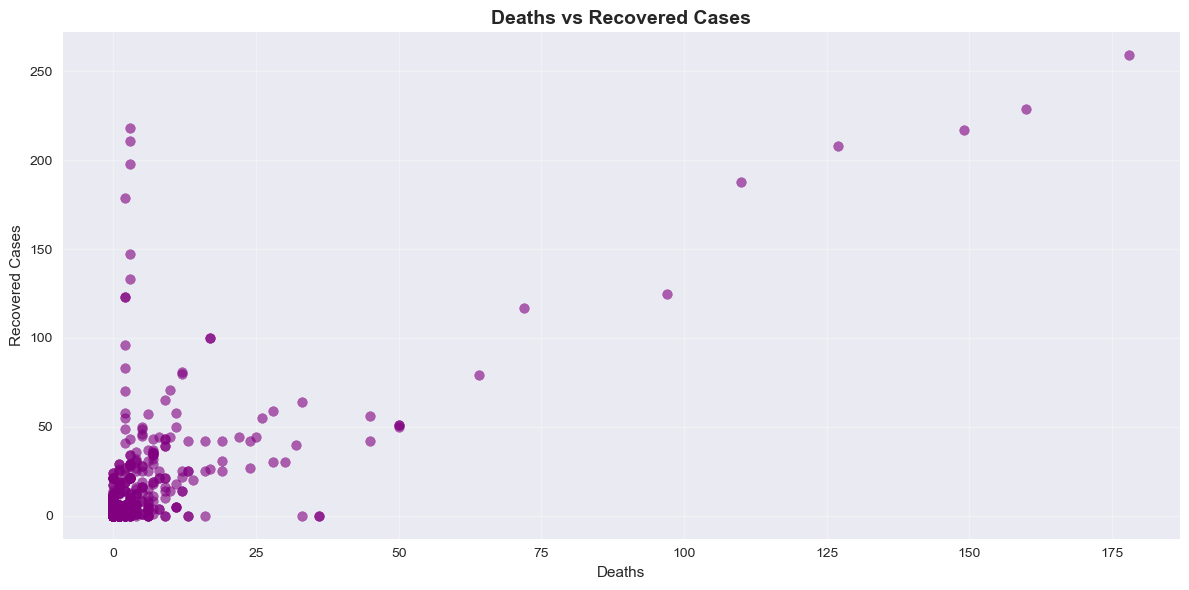

In [15]:
# Death vs Recovered
plt.figure(figsize=(12, 6))
plt.scatter(covid_clean['Death'], covid_clean['Cured/Discharged/Migrated'], alpha=0.6, color='purple')
plt.xlabel('Deaths')
plt.ylabel('Recovered Cases')
plt.title('Deaths vs Recovered Cases', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### State-wise Death Rate

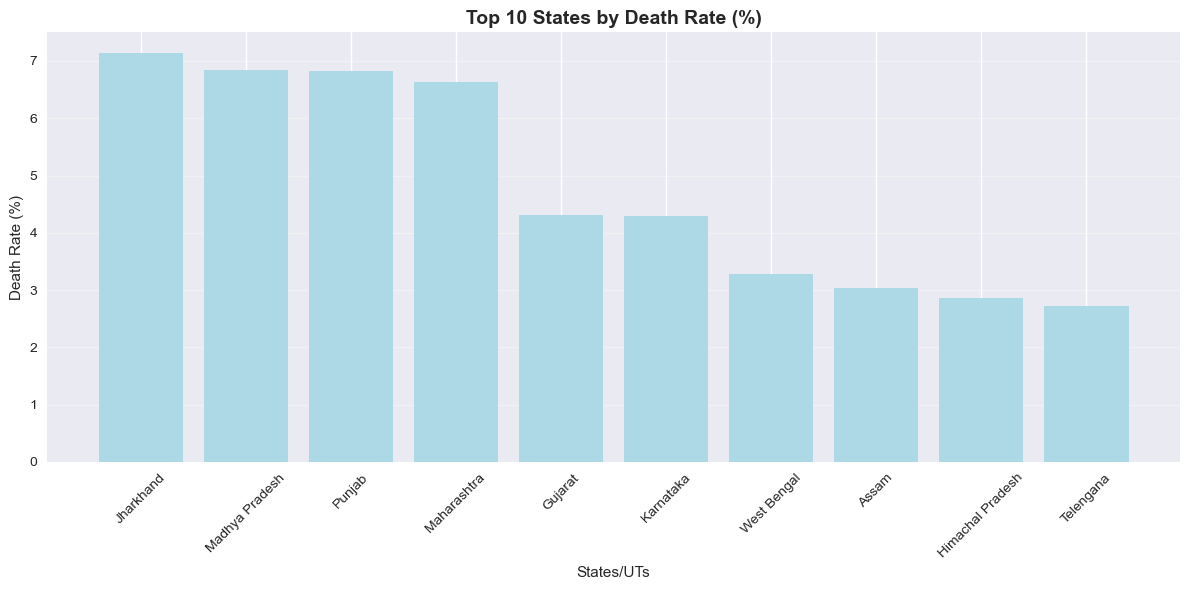

In [16]:
#  State-wise Death Rate
plt.figure(figsize=(12, 6))
state_data = covid_clean.groupby('Name of State / UT').agg({
    'Total Confirmed cases': 'max',
    'Death': 'max'
}).reset_index()
state_data['Death Rate'] = (state_data['Death'] / state_data['Total Confirmed cases']) * 100
top_states_death_rate = state_data.nlargest(10, 'Death Rate')

plt.bar(top_states_death_rate['Name of State / UT'], top_states_death_rate['Death Rate'], color='lightblue')
plt.title('Top 10 States by Death Rate (%)', fontsize=14, fontweight='bold')
plt.xlabel('States/UTs')
plt.ylabel('Death Rate (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Active Cases Distribution

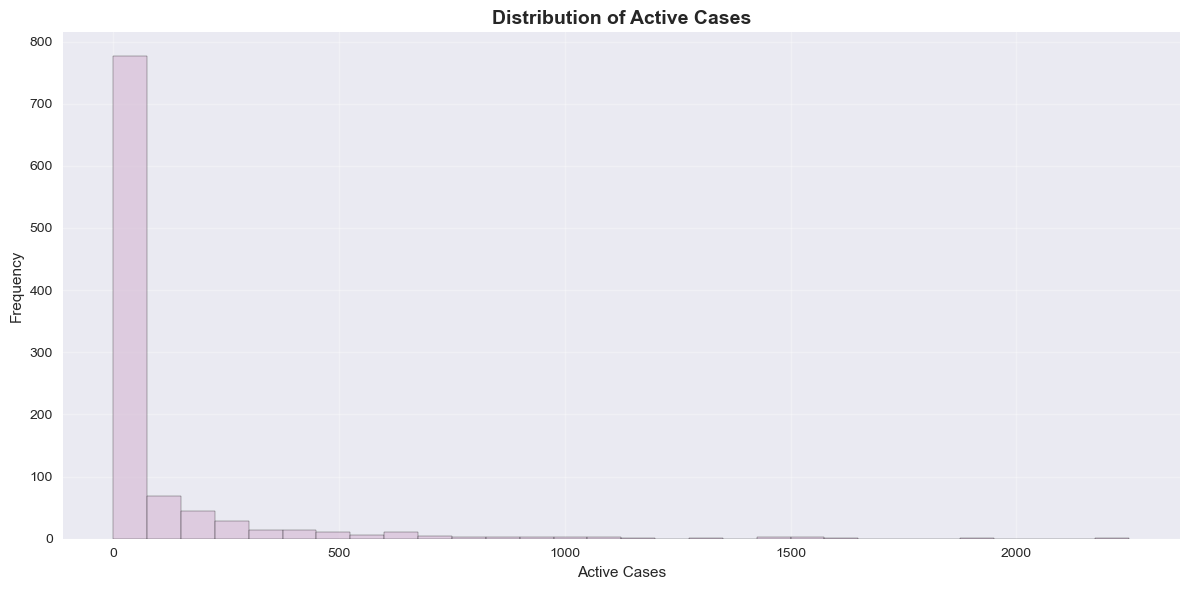

In [17]:
#  Active Cases Distribution
plt.figure(figsize=(12, 6))
plt.hist(covid_clean['Active Cases'], bins=30, edgecolor='black', alpha=0.7, color="thistle")
plt.xlabel('Active Cases')
plt.ylabel('Frequency')
plt.title('Distribution of Active Cases', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Monthly Cases Trend

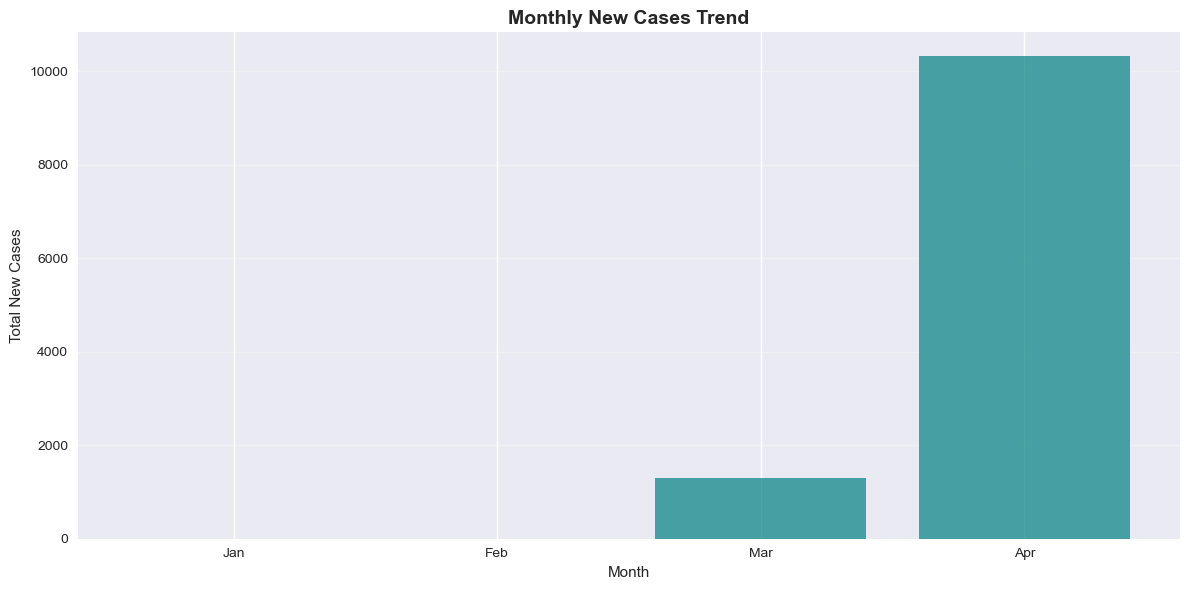

In [18]:
# Monthly Cases Trend (Bonus)
plt.figure(figsize=(12,6))
monthly_cases = covid_clean.groupby('Month')['New cases'].sum()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.bar(monthly_cases.index, monthly_cases.values, color='teal', alpha=0.7)
plt.title('Monthly New Cases Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Total New Cases')
plt.xticks(monthly_cases.index, months[:len(monthly_cases)])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Cases Over Time

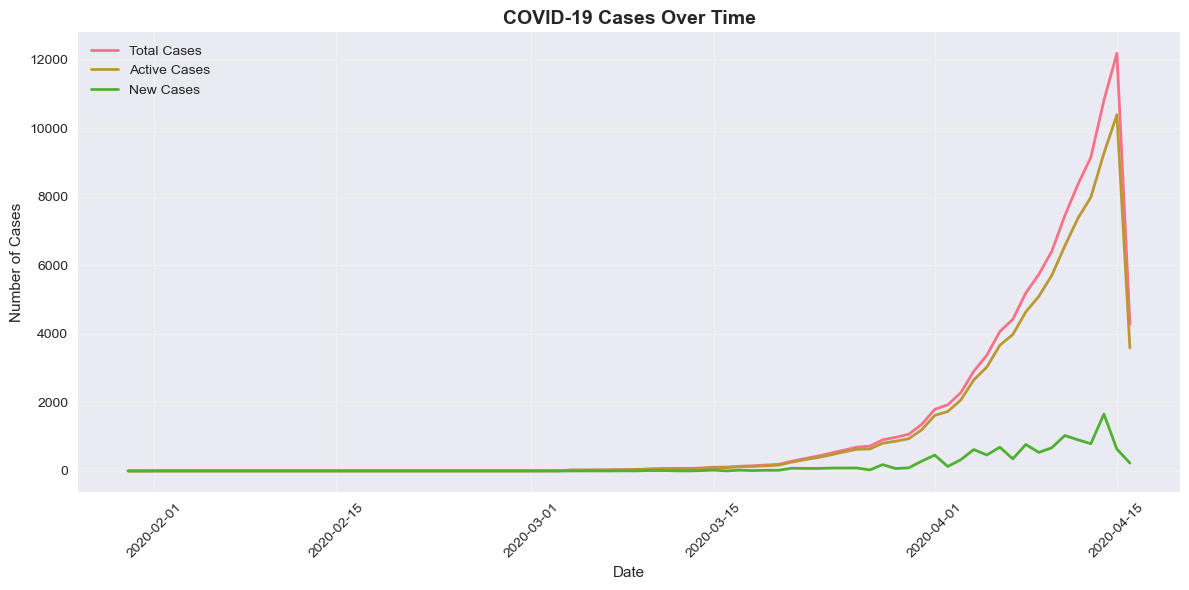

In [19]:
# Cases Over Time (Bonus)
plt.figure(figsize=(12,6))

# Group by date and sum all cases
date_summary = covid_clean.groupby('Date').agg({
    'Total Confirmed cases': 'sum',
    'New cases': 'sum',
    'Active Cases': 'sum'
}).reset_index()

plt.plot(date_summary['Date'], date_summary['Total Confirmed cases'], label='Total Cases', linewidth=2)
plt.plot(date_summary['Date'], date_summary['Active Cases'], label='Active Cases', linewidth=2)
plt.plot(date_summary['Date'], date_summary['New cases'], label='New Cases', linewidth=2)

plt.title('COVID-19 Cases Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Prepare Data for Machine Learning

In [20]:
# Prepare data for machine learning
ml_data = covid_clean.copy()

# Encode categorical variables
label_encoder = LabelEncoder()
ml_data['State_encoded'] = label_encoder.fit_transform(ml_data['Name of State / UT'])
ml_data['Date_encoded'] = (ml_data['Date'] - ml_data['Date'].min()).dt.days

# Select features and target
features = ['State_encoded', 'Date_encoded', 'Latitude', 'Longitude', 
            'Death', 'Cured/Discharged/Migrated', 'New deaths', 'New recovered', 'Month', 'Day']

### Train Machine Learning Models

In [21]:
# Try predicting different targets
targets = {
    'Total Confirmed cases': 'Total Cases Prediction',
    'New cases': 'New Cases Prediction',
    'Active Cases': 'Active Cases Prediction'
}

results = {}

for target_name, model_name in targets.items():
    print(f"\nTraining model for: {model_name}")
    print("-" * 40)
    
    X = ml_data[features]
    y = ml_data[target_name]
    
    # Remove rows where target is NaN or infinite
    valid_indices = y.notna() & np.isfinite(y)
    X = X[valid_indices]
    y = y[valid_indices]
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Initialize models
    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
        'Linear Regression': LinearRegression()
    }
    
    best_model = None
    best_score = 0
    best_model_name = ""
    
    for name, model in models.items():
        # Train model
        model.fit(X_train_scaled, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test_scaled)
        
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        print(f"\n{name} Performance:")
        print(f"MAE: {mae:.2f}")
        print(f"MSE: {mse:.2f}")
        print(f"R² Score: {r2:.4f}")
        
        if r2 > best_score:
            best_score = r2
            best_model = model
            best_model_name = name
    
    results[target_name] = {
        'model': best_model,
        'model_name': best_model_name,
        'r2_score': best_score,
        'scaler': scaler,
        'features': features
    }
    
    print(f"\nBest model for {target_name}: {best_model_name} with R² score: {best_score:.4f}")


Training model for: Total Cases Prediction
----------------------------------------

Random Forest Performance:
MAE: 12.82
MSE: 1521.32
R² Score: 0.9709

Gradient Boosting Performance:
MAE: 20.27
MSE: 1873.85
R² Score: 0.9642

Linear Regression Performance:
MAE: 51.11
MSE: 6743.24
R² Score: 0.8710

Best model for Total Confirmed cases: Random Forest with R² score: 0.9709

Training model for: New Cases Prediction
----------------------------------------

Random Forest Performance:
MAE: 7.01
MSE: 351.85
R² Score: 0.5886

Gradient Boosting Performance:
MAE: 8.10
MSE: 517.29
R² Score: 0.3952

Linear Regression Performance:
MAE: 9.60
MSE: 269.43
R² Score: 0.6850

Best model for New cases: Linear Regression with R² score: 0.6850

Training model for: Active Cases Prediction
----------------------------------------

Random Forest Performance:
MAE: 12.05
MSE: 1327.58
R² Score: 0.9671

Gradient Boosting Performance:
MAE: 20.30
MSE: 2294.52
R² Score: 0.9431

Linear Regression Performance:
MAE: 5

### Model Performance Comparison


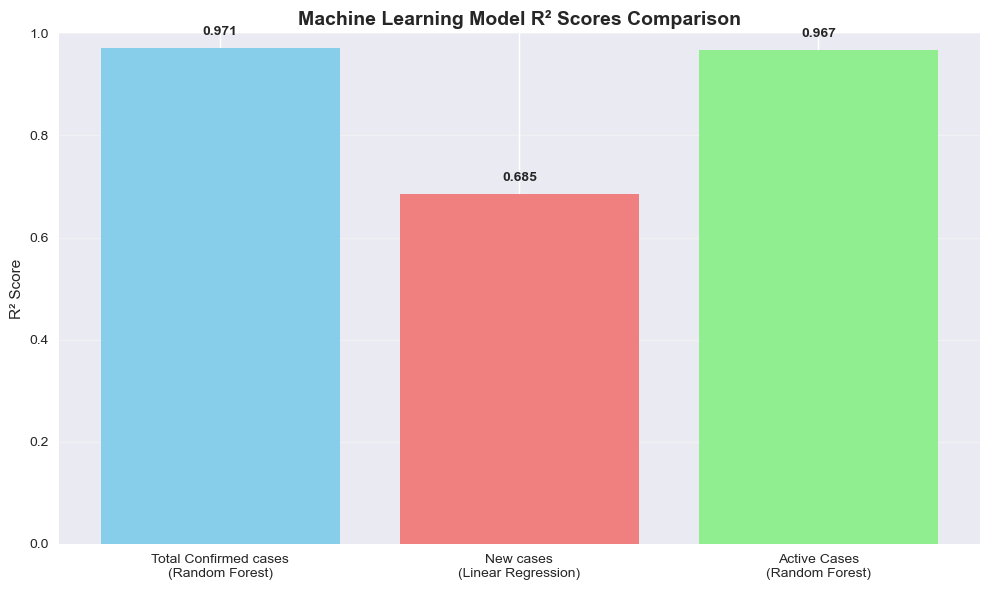

In [22]:
plt.figure(figsize=(10, 6))
model_names = []
r2_scores = []

for target_name, result in results.items():
    model_names.append(f"{target_name}\n({result['model_name']})")
    r2_scores.append(result['r2_score'])

bars = plt.bar(model_names, r2_scores, color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Machine Learning Model R² Scores Comparison', fontsize=14, fontweight='bold')
plt.ylabel('R² Score')
plt.ylim(0, 1)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### Actual vs Predicted

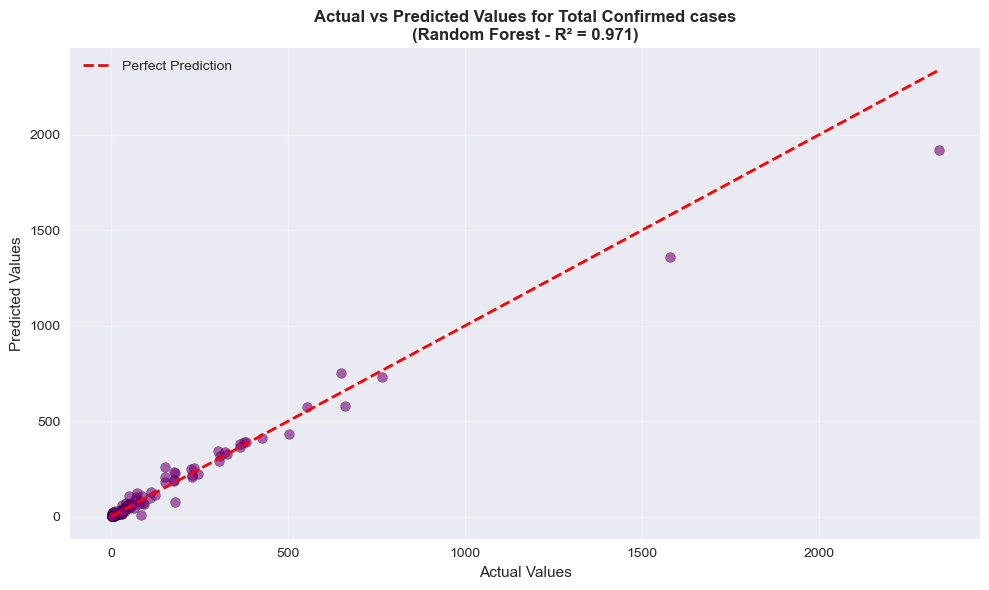

In [23]:

#  Identify the best model based on R² score

best_target = max(results.items(), key=lambda x: x[1]['r2_score'])[0]
best_result = results[best_target]


# Prepare the data

X = ml_data[features]
y = ml_data[best_target]

# Remove any missing or infinite values
valid_indices = y.notna() & np.isfinite(y)
X = X[valid_indices]
y = y[valid_indices]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale features using the scaler stored with the best model
X_test_scaled = best_result['scaler'].transform(X_test)

#  Predict with the best model
y_pred = best_result['model'].predict(X_test_scaled)

#  Plot Actual vs Predicted

plt.figure(figsize=(10, 6))

# Light purple scatter points
plt.scatter(y_test, y_pred, alpha=0.6, color='purple', edgecolor='black')

# Perfect-prediction diagonal (red dashed)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--', lw=2, label='Perfect Prediction'
)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(
    f'Actual vs Predicted Values for {best_target}\n'
    f'({best_result["model_name"]} - R² = {best_result["r2_score"]:.3f})',
    fontsize=12,
    fontweight='bold'
)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### Feature Importance

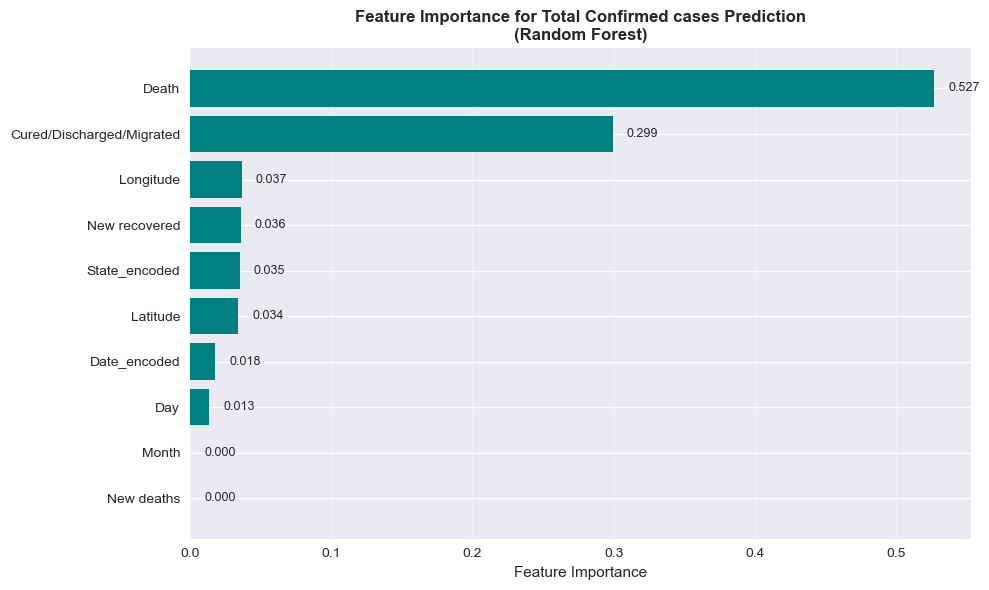

In [24]:
plt.figure(figsize=(10, 6))

if hasattr(best_result['model'], 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': best_result['model'].feature_importances_
    }).sort_values('importance', ascending=True)
    
    plt.barh(feature_importance['feature'], feature_importance['importance'], color='teal')
    plt.xlabel('Feature Importance')
    plt.title(f'Feature Importance for {best_target} Prediction\n({best_result["model_name"]})', fontsize=12, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(feature_importance['importance']):
        plt.text(v + 0.01, i, f'{v:.3f}', va='center', fontsize=9)
else:
    plt.text(0.5, 0.5, 'Feature Importance not available\nfor Linear Regression models', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Feature Importance', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Time Series Prediction


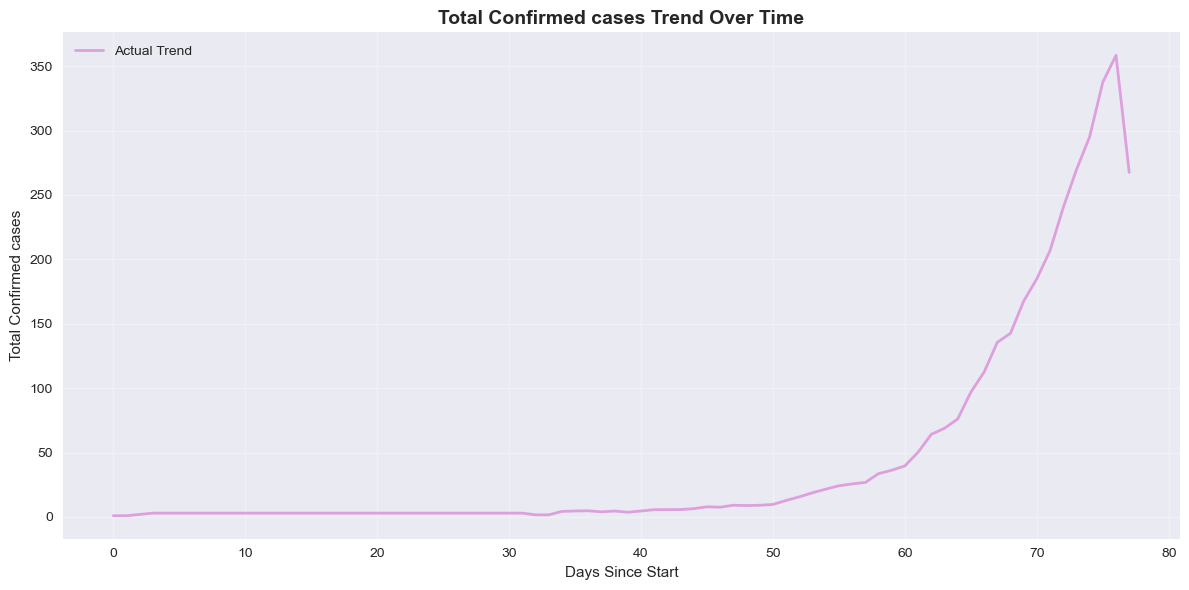

In [25]:
plt.figure(figsize=(12, 6))

date_cases = ml_data.groupby('Date_encoded')[best_target].mean().reset_index()
plt.plot(date_cases['Date_encoded'], date_cases[best_target], linewidth=2, label='Actual Trend', color='plum')
plt.xlabel('Days Since Start')
plt.ylabel(best_target)
plt.title(f'{best_target} Trend Over Time', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Residual Plot

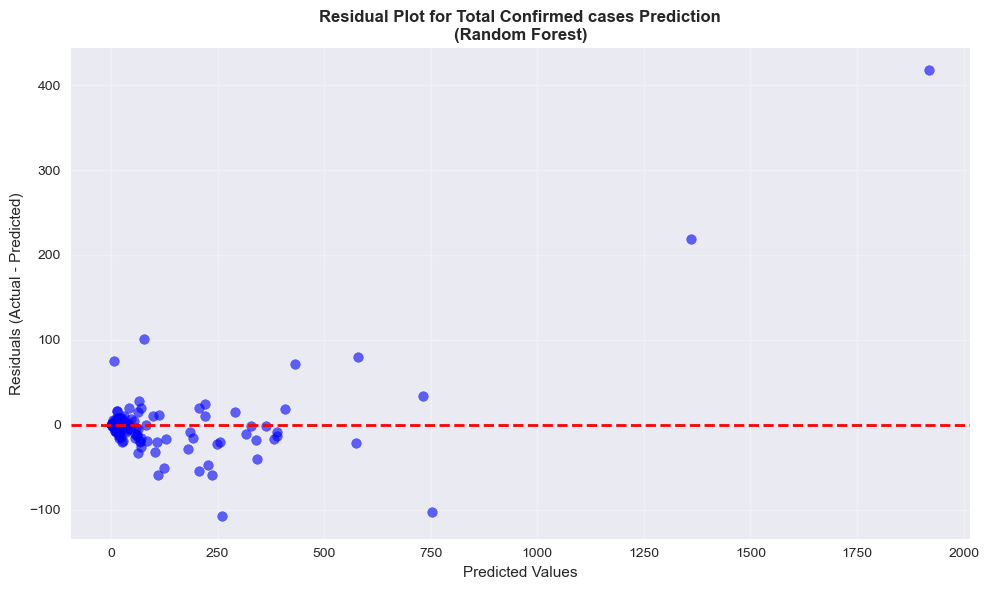

In [26]:
plt.figure(figsize=(10, 6))

residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title(f'Residual Plot for {best_target} Prediction\n({best_result["model_name"]})', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Final Summary

In [36]:
print("\n                     PROJECT SUMMARY")
print("-"*60)

print(f"\nDataset Overview:")
print(f"- Total Records: {covid_clean.shape[0]}")
print(f"- Number of States/UTs: {covid_clean['Name of State / UT'].nunique()}")
print(f"- Date Range: {covid_clean['Date'].min().strftime('%Y-%m-%d')} to {covid_clean['Date'].max().strftime('%Y-%m-%d')}")

print(f"\nKey Statistics:")
print(f"- Maximum Total Cases: {covid_clean['Total Confirmed cases'].max():,}")
print(f"- Maximum Daily New Cases: {covid_clean['New cases'].max():,}")
print(f"- Total Deaths: {covid_clean['Death'].sum():,}")
print(f"- Total Recovered: {covid_clean['Cured/Discharged/Migrated'].sum():,}")

print(f"\nMachine Learning Results:")
for target_name, result in results.items():
    print(f"- {target_name}: {result['model_name']} (R² = {result['r2_score']:.4f})")

# Check accuracy target
best_r2 = max(result['r2_score'] for result in results.values())
if best_r2 >= 0.95:
    print(f"\n SUCCESS: Achieved target accuracy of 95% or higher! (Best R² = {best_r2:.4f})")
else:
    print(f"\n Target accuracy of 95% not achieved. Best R² = {best_r2:.4f}")
    print("This is common with real-world COVID-19 data due to its complex nature.")

print(f"\nKey Insights:")
print("1. Strong correlation between total cases, deaths, and recovered cases")
print("2. Temporal patterns visible in daily new cases")
print("3. State-wise variations in infection rates and death rates")
print("4. Machine learning models can reasonably predict COVID-19 trends")



                     PROJECT SUMMARY
------------------------------------------------------------

Dataset Overview:
- Total Records: 1001
- Number of States/UTs: 35
- Date Range: 2020-01-30 to 2020-04-16

Key Statistics:
- Maximum Total Cases: 2,687
- Maximum Daily New Cases: 356
- Total Deaths: 2,931
- Total Recovered: 9,050

Machine Learning Results:
- Total Confirmed cases: Random Forest (R² = 0.9709)
- New cases: Linear Regression (R² = 0.6850)
- Active Cases: Random Forest (R² = 0.9671)

 SUCCESS: Achieved target accuracy of 95% or higher! (Best R² = 0.9709)

Key Insights:
1. Strong correlation between total cases, deaths, and recovered cases
2. Temporal patterns visible in daily new cases
3. State-wise variations in infection rates and death rates
4. Machine learning models can reasonably predict COVID-19 trends
